<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/projects/DylaLaurU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Background: Formula 1 is a sport in which drivers compete for two titles. The World driver's championship (WDC) and the World Constructiors Champonship (WCC). These two champonships have points scored based on finishing place in every race. With only the top 10 out of 20 places scoring points. Lando Norris races for the McLaren F1 team and is contention for the WDC and the WCC for McLaren and to continue this he MUST score points this next race. He has become a dominat player this year as McLaren has added a host of upgrades to their car. After winning multiple races this season I am confident that he will place AT LEAST 4th, if not higher in the 17th race of the season (happening this sunday) the Azerbaijan grand prix. Azerbaijan is a street circut. This means it does NOT take place on a dedecated year round race track. The circut is constructed every year in the same place to be identical to last year. HOWEVER the road conditions instead of track conditions combined with the narrow witdth of the "track" make this one of the more challenging races of the season.
**Other info **
Each of the 10 teams in F1 consists of TWO drivers who compete TOGETHER to score poitnts for the WCC, but compete AGAINST each other for the WDC

Claim: Lando Norris WILL finish 4th or HIGHER in the Azerbaijan grand prix

In [1]:
#importing Nessecary code first
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 524.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


<Axes: >

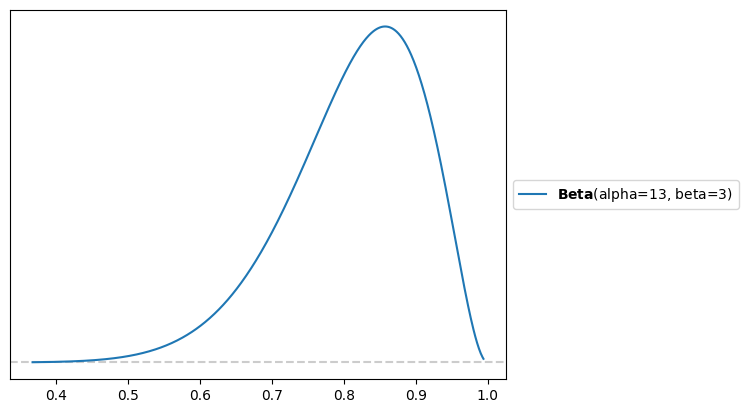

In [2]:
#beta distrobution models likelihood of each place occouring
pz.Beta(alpha=13,beta=3).plot_pdf()

My prior above shows my confidence that Lando Norris will finish 4th or HIGHER place in race 17. My reasonings for making this prediction are as follows...

1. Lando norris has WON multiple races this season BUT
2. Lando Norris has LED most of the Grand prix this year
3. Lando Norris did NOT beat Charles Leclerc at Monaco (the last street circut they raced at)
4. Lando Norris did NOT beat his teammate (Oscar Piastri) last race
5. Ferrari does well at street circuts
6. McLaren has easily the most dominant car this season

Therefore I place Lando Norris 4, behind Carlos Sainz (Other Ferrari Driver), Oscar Piastri, and Charles Leclerc. I am highly (85%) confident of this pediction.  AND as part of that I am saying that Lando may out place any of these drivers during the race

**But we only care about Lando for now**


Now that I have made my guess. Here is what I found about Lando this season
(data from https://www.motorsportstats.com/driver/lando-norris/summary/series/fia-formula-one-world-championship **AND F1 website**)  

AVERAGE FINISH PLACE THIS SEASON: 4.67
He finished 19.17% on the podum (top 3) this season
Out of the 16 races this season Lando has placed in the top 4  11 of those times. This shows that my prior is in fact valid.

<Axes: >

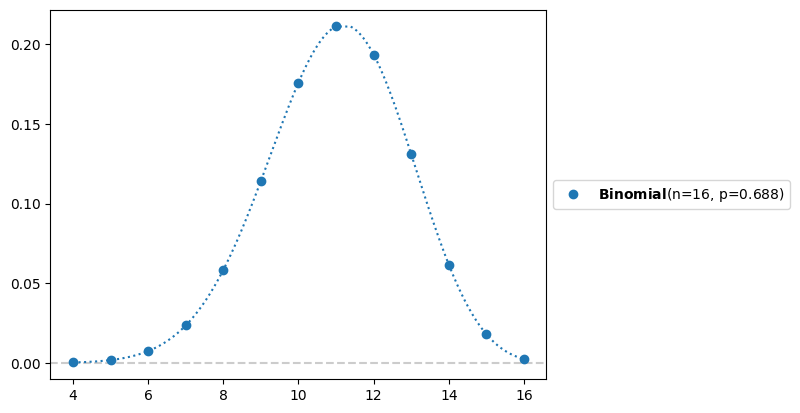

In [3]:
pz.Binomial(n = 16, p = 11/16 ).plot_pdf()

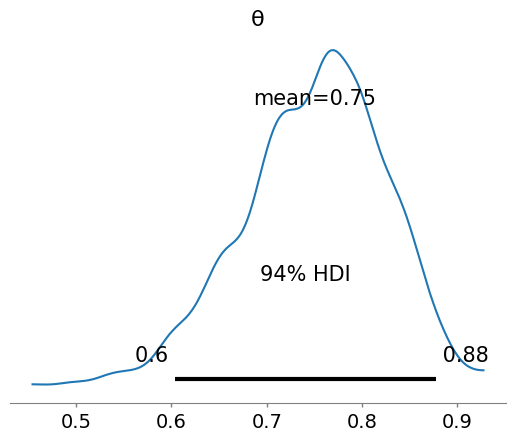

In [12]:
import pymc as pm
Lan_p4plu = np.repeat(1,11)
Lan_p4min = np.repeat(0,5)

placement_data = np.concatenate( [Lan_p4plu,Lan_p4min] )

with pm.Model() as Lan_poi_model:

  θ = pm.Beta('θ' , alpha = 13. , beta = 3.)

  y = pm.Bernoulli('y', p = θ, observed = placement_data)

  idata_place = pm.sample(1000)

  import arviz as az
  az.plot_posterior(idata_place)

In [13]:
pm.sample_posterior_predictive(idata_place, model=Lan_poi_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

So, after running the code I can see that the model is actually less confient than me. (5% less confident but that's still something). A 94% HDI shows us that we can be reasonably confident in this model because 94% of the data is between 60% and 88%, so i decided to run the code to see what it predicts the next result will be and though this isnt the most accurate perdiction it does do something. It says that Lando WILL place in the top 4 of this next race! However with an 88% highest confidence I am still unsure if it will actually happen.

P.S.
After my prior was created the Free Practice 1 and 2 sessions occoured with McLaren not placing in the top 3 on either of them. So, I am becoming less and less confident by the day.